In [1]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")


In [2]:
#  Load the COVID-19 vaccination dataset
# We'll use live data from 'Our World in Data'

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)
df.head()


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [3]:
# Understand the structure of our data

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196246 entries, 0 to 196245
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             196246 non-null  object 
 1   iso_code                             196246 non-null  object 
 2   date                                 196246 non-null  object 
 3   total_vaccinations                   85417 non-null   float64
 4   people_vaccinated                    81132 non-null   float64
 5   people_fully_vaccinated              78061 non-null   float64
 6   total_boosters                       53600 non-null   float64
 7   daily_vaccinations_raw               70971 non-null   float64
 8   daily_vaccinations                   195029 non-null  float64
 9   total_vaccinations_per_hundred       85417 non-null   float64
 10  people_vaccinated_per_hundred        81132 non-null   float64
 11  people_fully_

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
count,8.541700e+04,8.113200e+04,7.806100e+04,5.360000e+04,7.097100e+04,1.950290e+05,85417.000000,81132.000000,78061.000000,53600.000000,195029.000000,1.921770e+05,192177.000000
mean,5.616980e+08,2.487064e+08,2.286639e+08,1.505811e+08,7.398640e+05,2.838758e+05,124.279558,53.501409,48.680182,36.301489,1851.477596,1.060707e+05,0.074980
std,1.842160e+09,8.006461e+08,7.403763e+08,4.360697e+08,3.183064e+06,1.922352e+06,85.098042,29.379655,29.042282,30.218208,3117.828731,7.866884e+05,0.176216
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.970788e+06,1.050009e+06,9.644000e+05,6.022820e+05,2.010000e+03,2.790000e+02,44.770000,27.880000,21.220000,5.920000,106.000000,4.300000e+01,0.001000
50%,1.439435e+07,6.901088e+06,6.191345e+06,5.765440e+06,2.053100e+04,3.871000e+03,130.550000,64.300000,57.920000,35.905000,605.000000,7.710000e+02,0.014000
75%,1.161972e+08,5.093295e+07,4.773185e+07,4.019072e+07,1.736115e+05,3.180300e+04,194.990000,77.780000,73.610000,57.620000,2402.000000,9.307000e+03,0.073000
max,1.357877e+10,5.631264e+09,5.177943e+09,2.817381e+09,4.967320e+07,4.369181e+07,410.230000,129.070000,126.890000,150.470000,117113.000000,2.107127e+07,11.711000


In [4]:
#  Identify top 10 countries by total vaccinations (latest date)

latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top_countries = latest_data.sort_values(by='total_vaccinations', ascending=False).head(10)
top_countries[['location', 'total_vaccinations']]


,location,total_vaccinations
193897,World,1.357877e+10
11505,Asia,9.104305e+09
186848,Upper middle income,5.449981e+09
78432,High income,2.840880e+09
59859,Europe,1.399334e+09
61209,European Union,9.511133e+08
110167,Malaysia,7.265729e+07
103194,Lithuania,4.604865e+06


/tmp/ipython-input-5-2149891350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-5-2149891350.py:13: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


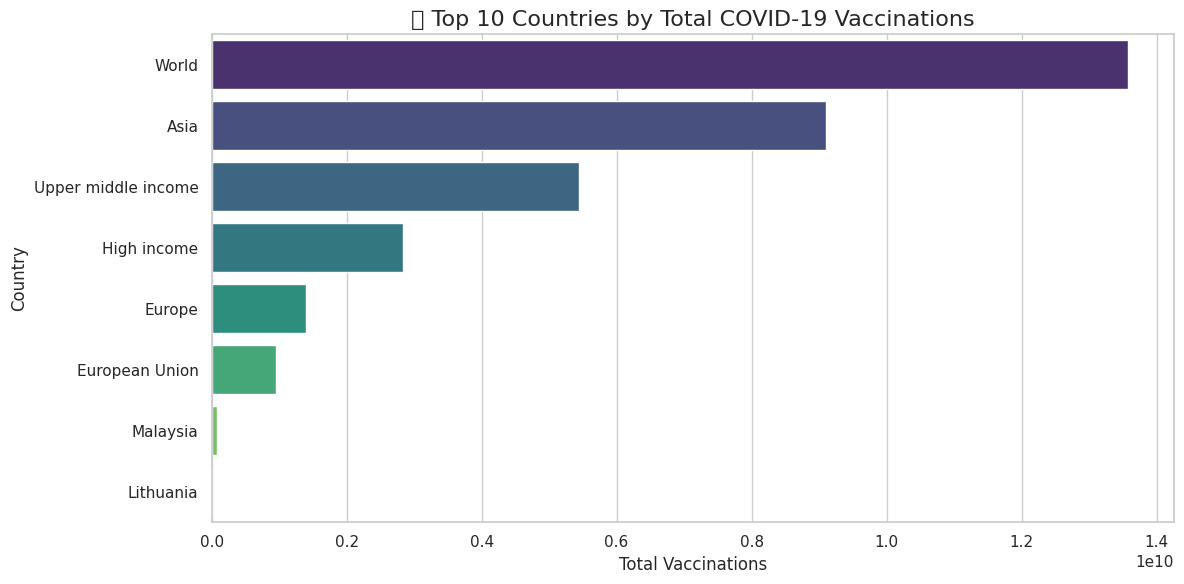

In [5]:
#  Visualize the top 10 countries with the most vaccinations

plt.figure(figsize=(12,6))
sns.barplot(
    x='total_vaccinations',
    y='location',
    data=top_countries,
    palette='viridis'
)
plt.title('🌎 Top 10 Countries by Total COVID-19 Vaccinations', fontsize=16)
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


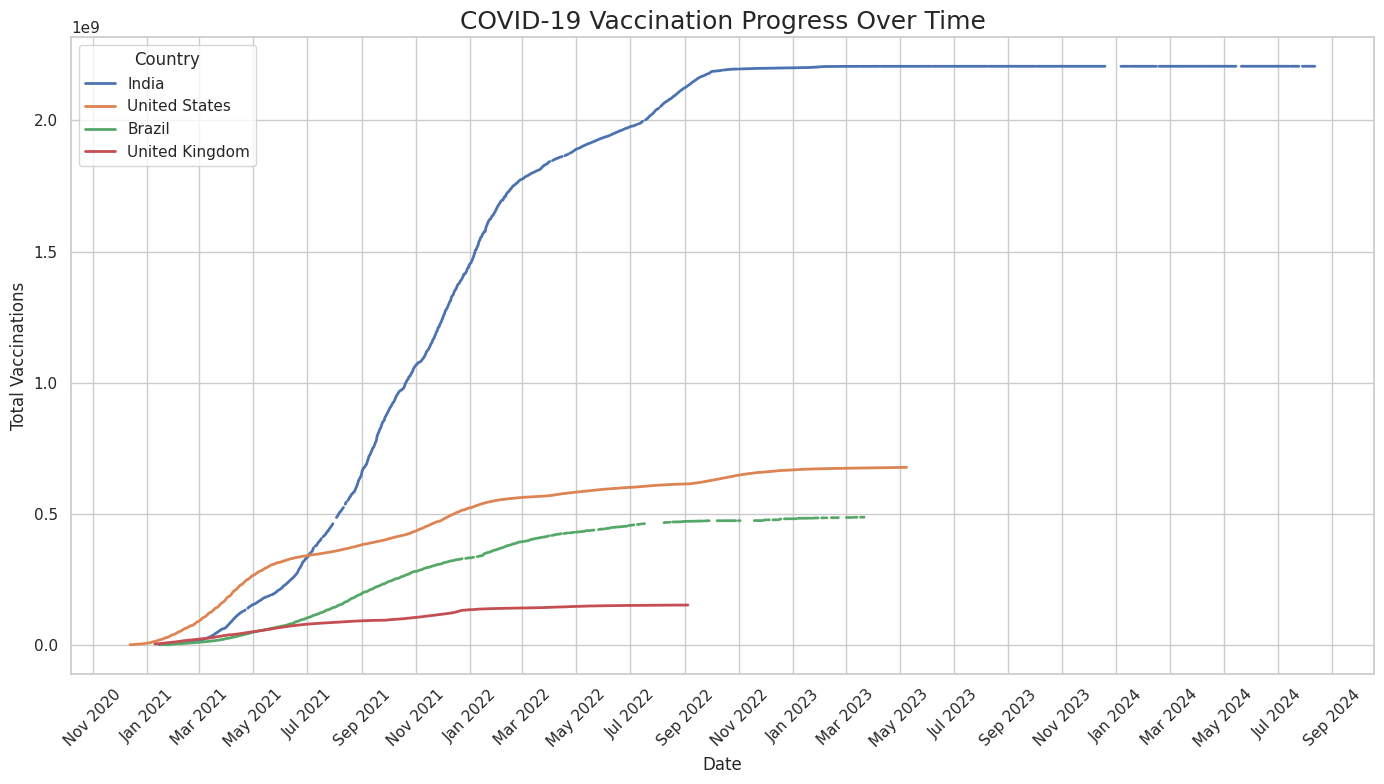

In [9]:
import matplotlib.dates as mdates  # ✅ Add this import at the top

plt.figure(figsize=(14, 8))

# ✅ Plot vaccination progress for each selected country
for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(
        pd.to_datetime(country_data['date']),  # Convert to datetime
        country_data['total_vaccinations'],
        label=country,
        linewidth=2
    )

# ✅ Clear axis labels and title
plt.title('COVID-19 Vaccination Progress Over Time', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Vaccinations', fontsize=12)

# ✅ Fix x-axis dates: show 1 tick every 2 months in readable format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# ✅ Final formatting
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()
